In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from scipy import stats
from sklearn import preprocessing
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn import tree
from sklearn.model_selection import cross_validate
from sklearn.model_selection import GridSearchCV
from sklearn.utils import resample
from imblearn.over_sampling import SMOTE
from imblearn.over_sampling import ADASYN
from imblearn.under_sampling import RandomUnderSampler
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

In [2]:
pd.set_option('display.max_columns',36)

In [3]:
firstimport = pd.read_csv (r'C:\Users\drdia\Desktop\proiect Crystal\data_predicted.csv')
firstimport

,Unnamed: 0,campaign_id,campaign_payout,clicks,conversions,revenue,lp_clicks,widget_id,cpc,prev_cpc,datetime,cost,impressions,widget_name,traffic_source_name,widget_numeric_id,traffic_source_numeric_id,widget_numeric_id_category,traffic_source_numeric_id_category,lpctr,payout,cw,net,TR.ROI,EPC,train_clicks,train_npc,train_roi,train_ctr,train_payout,prediction_class_id,predictions_class,prob_no_changes,prob_increase,prob_decrease,prob_stop
0,31879,0ebf9a5749597f71386aa6c6662c3bcf,2.210541,3,1,3.0,0,875c6caadd4678018842f346b1e643ae,14.000,14.00,8/9/2020 10:00,0.32,0,57311817,Mgid,811122,9,82847,2,0.0,3.000000,0ebf9a5749597f71386aa6c6662c3bcf875c6caadd4678...,2.68,8.375000,1.000000,3,0.893333,8.375000,1.000000,3.000000,undefined,undefined,undefined,undefined,undefined,undefined
1,31940,0ebf9a5749597f71386aa6c6662c3bcf,2.210541,3,1,3.0,0,95a95a0208cb07aa9ae0294533a897b5,14.000,14.00,8/7/2020 10:00,0.45,0,57286767s1395514392,Mgid,784441,9,74298,2,0.0,3.000000,0ebf9a5749597f71386aa6c6662c3bcf95a95a0208cb07...,2.55,5.666667,1.000000,3,0.850000,5.666667,1.000000,3.000000,undefined,undefined,undefined,undefined,undefined,undefined
2,32360,0ebf9a5749597f71386aa6c6662c3bcf,2.210541,3,1,1.0,0,e6eca8b9662f0ee12a3e49136d97cc1b,14.000,14.00,8/22/2020 17:00,0.42,0,57304029,Mgid,805984,9,79993,2,0.0,1.000000,0ebf9a5749597f71386aa6c6662c3bcfe6eca8b9662f0e...,0.58,1.380952,0.333333,3,0.193333,1.380952,1.000000,1.000000,undefined,undefined,undefined,undefined,undefined,undefined
3,32363,0ebf9a5749597f71386aa6c6662c3bcf,2.210541,3,1,2.0,0,e73e596d6dec40a11baee206ceb7319c,14.000,14.00,7/31/2020 10:00,0.46,0,57193354,Mgid,725141,9,63621,2,0.0,2.000000,0ebf9a5749597f71386aa6c6662c3bcfe73e596d6dec40...,1.54,3.347826,0.666667,3,0.513333,3.347826,1.000000,2.000000,undefined,undefined,undefined,undefined,undefined,undefined
4,32465,0ebf9a5749597f71386aa6c6662c3bcf,2.210541,3,1,1.0,0,f94a048d2ee7642651598639c9ab8b8c,14.000,14.00,8/22/2020 17:00,0.46,0,57276831,Mgid,780842,9,73052,2,0.0,1.000000,0ebf9a5749597f71386aa6c6662c3bcff94a048d2ee764...,0.54,1.173913,0.333333,3,0.180000,1.173913,1.000000,1.000000,undefined,undefined,undefined,undefined,undefined,undefined
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
115649,216562,58c5d76ee86b9ad6a7abf82e158b557f,0.190098,57347,15610,2847.0,0,f5b3e874eea4a274509febc793a7a407,3.060,3.06,8/26/2020 17:00,1849.01,0,57089195,Mgid,574028,9,53796,2,0.0,0.182383,58c5d76ee86b9ad6a7abf82e158b557ff5b3e874eea4a2...,997.99,0.539743,0.049645,57347,0.017403,0.539743,1.000000,0.182383,undefined,undefined,undefined,undefined,undefined,undefined
115650,216563,58c5d76ee86b9ad6a7abf82e158b557f,0.190098,57353,15610,2847.0,0,f5b3e874eea4a274509febc793a7a407,2.940,2.94,9/4/2020 22:00,1849.16,0,57089195,Mgid,574028,9,53796,2,0.0,0.182383,58c5d76ee86b9ad6a7abf82e158b557ff5b3e874eea4a2...,997.84,0.539618,0.049640,57353,0.017398,0.539618,1.000000,0.182383,undefined,undefined,undefined,undefined,undefined,undefined
115651,216564,58c5d76ee86b9ad6a7abf82e158b557f,0.190098,57357,15610,2847.0,0,f5b3e874eea4a274509febc793a7a407,2.930,2.93,9/5/2020 3:00,1849.31,0,57089195,Mgid,574028,9,53796,2,0.0,0.182383,58c5d76ee86b9ad6a7abf82e158b557ff5b3e874eea4a2...,997.69,0.539493,0.049636,57357,0.017394,0.539493,1.000000,0.182383,undefined,undefined,undefined,undefined,undefined,undefined
115652,216565,58c5d76ee86b9ad6a7abf82e158b557f,0.190098,63175,16846,3134.0,0,f5b3e874eea4a274509febc793a7a407,2.910,2.91,9/5/2020 6:00,2001.09,0,57089195,Mgid,574028,9,53796,2,0.0,0.186038,58c5d76ee86b9ad6a7abf82e158b557ff5b3e874eea4a2...,1132.91,0.566146,0.049608,63175,0.017933,0.566146,1.000000,0.186038,undefined,undefined,undefined,undefined,undefined,undefined


In [4]:
firstimport.describe()

,Unnamed: 0,campaign_payout,clicks,conversions,revenue,lp_clicks,cpc,prev_cpc,cost,impressions,widget_numeric_id,traffic_source_numeric_id,widget_numeric_id_category,traffic_source_numeric_id_category,lpctr,payout,net,TR.ROI,EPC,train_clicks,train_npc,train_roi,train_ctr,train_payout
count,115654.000000,115654.000000,115654.000000,115654.000000,115654.000000,115654.000000,115654.000000,115654.000000,115654.000000,1.156540e+05,1.156540e+05,115654.000000,115654.000000,115654.000000,115654.000000,115654.000000,115654.000000,115654.000000,115654.000000,115654.000000,115654.000000,115654.000000,115654.000000,115654.000000
mean,330791.822375,16.706567,1690.222621,43.495876,410.724396,287.673535,5.561458,5.456388,366.203683,5.206290e+05,7.010461e+05,8.901897,72709.909195,1.585254,0.163274,16.282145,44.520713,5.322413,0.570918,1690.222621,0.400845,5.322413,0.547873,16.282145
std,196569.237657,22.678787,8202.300880,376.091370,4031.909551,1815.457603,8.107772,8.015966,4313.664706,5.676842e+06,3.235050e+05,2.755103,35591.106428,1.022352,0.174371,20.916898,1090.965160,170.509421,2.138706,8202.300880,2.132068,170.509421,0.495302,20.916898
min,91.000000,0.053529,3.000000,1.000000,0.180000,0.000000,0.000000,0.000000,0.004000,0.000000e+00,2.490000e+02,6.000000,13.000000,0.000000,0.000000,0.173228,-103911.630000,-0.998256,0.000083,3.000000,-29.914876,-0.998256,0.000007,0.173228
25%,153008.250000,1.570766,50.000000,2.000000,7.000000,0.000000,0.250000,0.245000,4.580000,0.000000e+00,4.546200e+05,7.000000,44107.000000,1.000000,0.000000,1.506667,-2.450000,-0.181246,0.068571,50.000000,-0.014868,-0.181246,0.003292,1.506667
50%,320637.500000,3.962121,231.000000,5.000000,40.000000,22.000000,1.990000,1.950000,23.950000,0.000000e+00,8.091310e+05,9.000000,81599.000000,2.000000,0.132019,4.000000,6.040000,0.550388,0.185185,231.000000,0.050000,0.550388,1.000000,4.000000
75%,500729.750000,30.018304,922.000000,16.000000,169.000000,114.000000,9.600000,9.340000,111.714000,8.457575e+04,9.714810e+05,9.000000,101226.000000,2.000000,0.237288,31.000000,53.780000,2.099212,0.426730,922.000000,0.215400,2.099212,1.000000,31.000000
max,655522.000000,508.823129,991945.000000,26257.000000,401442.000000,81951.000000,130.060000,130.060000,429786.110000,5.007547e+08,1.129824e+06,21.000000,138440.000000,5.000000,1.000000,87.000000,106817.340000,43899.000000,128.000000,991945.000000,127.680000,43899.000000,1.000000,87.000000


In [6]:
firstimport.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 115654 entries, 0 to 115653
Data columns (total 36 columns):
 #   Column                              Non-Null Count   Dtype  
---  ------                              --------------   -----  
 0   Unnamed: 0                          115654 non-null  int64  
 1   campaign_id                         115654 non-null  object 
 2   campaign_payout                     115654 non-null  float64
 3   clicks                              115654 non-null  int64  
 4   conversions                         115654 non-null  int64  
 5   revenue                             115654 non-null  float64
 6   lp_clicks                           115654 non-null  int64  
 7   widget_id                           115654 non-null  object 
 8   cpc                                 115654 non-null  float64
 9   prev_cpc                            115654 non-null  float64
 10  datetime                            115654 non-null  object 
 11  cost                      

In [7]:
firstimport.isna().sum()

Unnamed: 0                            0
campaign_id                           0
campaign_payout                       0
clicks                                0
conversions                           0
revenue                               0
lp_clicks                             0
widget_id                             0
cpc                                   0
prev_cpc                              0
datetime                              0
cost                                  0
impressions                           0
widget_name                           0
traffic_source_name                   0
widget_numeric_id                     0
traffic_source_numeric_id             0
widget_numeric_id_category            0
traffic_source_numeric_id_category    0
lpctr                                 0
payout                                0
cw                                    0
net                                   0
TR.ROI                                0
EPC                                   0


In [8]:
firstimport.predictions_class.value_counts()

undefined     64873
stop          30718
no_changes    13918
decrease       5816
increase        329
Name: predictions_class, dtype: int64

In [9]:
firstimport.corr()

,Unnamed: 0,campaign_payout,clicks,conversions,revenue,lp_clicks,cpc,prev_cpc,cost,impressions,widget_numeric_id,traffic_source_numeric_id,widget_numeric_id_category,traffic_source_numeric_id_category,lpctr,payout,net,TR.ROI,EPC,train_clicks,train_npc,train_roi,train_ctr,train_payout
Unnamed: 0,1.000000,0.022913,0.028628,-0.019434,0.002357,0.009028,-0.141157,-0.140929,0.001080,0.014563,-0.037973,0.036925,-0.022572,-0.003101,-0.068671,0.018300,0.004439,-0.006141,-0.023379,0.028628,-0.016813,-0.006141,-0.061891,0.018300
campaign_payout,0.022913,1.000000,0.079302,-0.036862,0.093133,0.101472,-0.274662,-0.268955,0.068719,0.068949,0.321941,-0.336116,0.312119,-0.417275,0.101305,0.938046,0.072479,0.024384,0.202819,0.079302,0.174089,0.024384,-0.443869,0.938046
clicks,0.028628,0.079302,1.000000,0.373397,0.519126,0.680056,-0.064834,-0.062971,0.498463,0.395189,-0.007373,0.012229,-0.004716,-0.007344,0.008183,0.088211,-0.052366,-0.005956,-0.031596,1.000000,-0.036197,-0.005956,-0.042183,0.088211
conversions,-0.019434,-0.036862,0.373397,1.000000,0.345787,0.298633,0.015322,0.016667,0.345352,0.269852,0.014236,-0.006069,0.014605,0.006302,-0.003753,-0.037816,-0.087585,-0.002764,-0.009914,0.373397,-0.016173,-0.002764,0.003636,-0.037816
revenue,0.002357,0.093133,0.519126,0.345787,1.000000,0.650377,-0.032572,-0.031697,0.968066,0.499688,0.035600,-0.027959,0.039407,-0.038821,0.059515,0.102985,-0.131995,-0.001172,0.011813,0.519126,-0.005870,-0.001172,-0.084843,0.102985
lp_clicks,0.009028,0.101472,0.680056,0.298633,0.650377,1.000000,-0.043646,-0.042139,0.630978,0.442151,-0.024185,0.043079,-0.015172,0.035434,0.195247,0.112407,-0.091263,-0.004298,-0.014252,0.680056,-0.026990,-0.004298,-0.062541,0.112407
cpc,-0.141157,-0.274662,-0.064834,0.015322,-0.032572,-0.043646,1.000000,0.981698,-0.028625,-0.054533,-0.316816,0.268608,-0.368350,0.402085,0.027141,-0.287894,-0.007192,-0.012355,-0.025686,-0.064834,-0.031017,-0.012355,0.583851,-0.287894
prev_cpc,-0.140929,-0.268955,-0.062971,0.016667,-0.031697,-0.042139,0.981698,1.000000,-0.027524,-0.053950,-0.316102,0.269030,-0.367169,0.400237,0.032847,-0.281782,-0.008312,-0.012319,-0.026040,-0.062971,-0.031553,-0.012319,0.578829,-0.281782
cost,0.001080,0.068719,0.498463,0.345352,0.968066,0.630978,-0.028625,-0.027524,1.000000,0.502217,0.026422,-0.015762,0.032801,-0.018745,0.050875,0.075663,-0.376282,-0.002589,0.001420,0.498463,-0.022268,-0.002589,-0.071480,0.075663
impressions,0.014563,0.068949,0.395189,0.269852,0.499688,0.442151,-0.054533,-0.053950,0.502217,1.000000,0.061091,-0.052050,0.070120,-0.059498,0.030329,0.075697,-0.139050,-0.002701,-0.003469,0.395189,-0.017391,-0.002701,-0.101112,0.075697


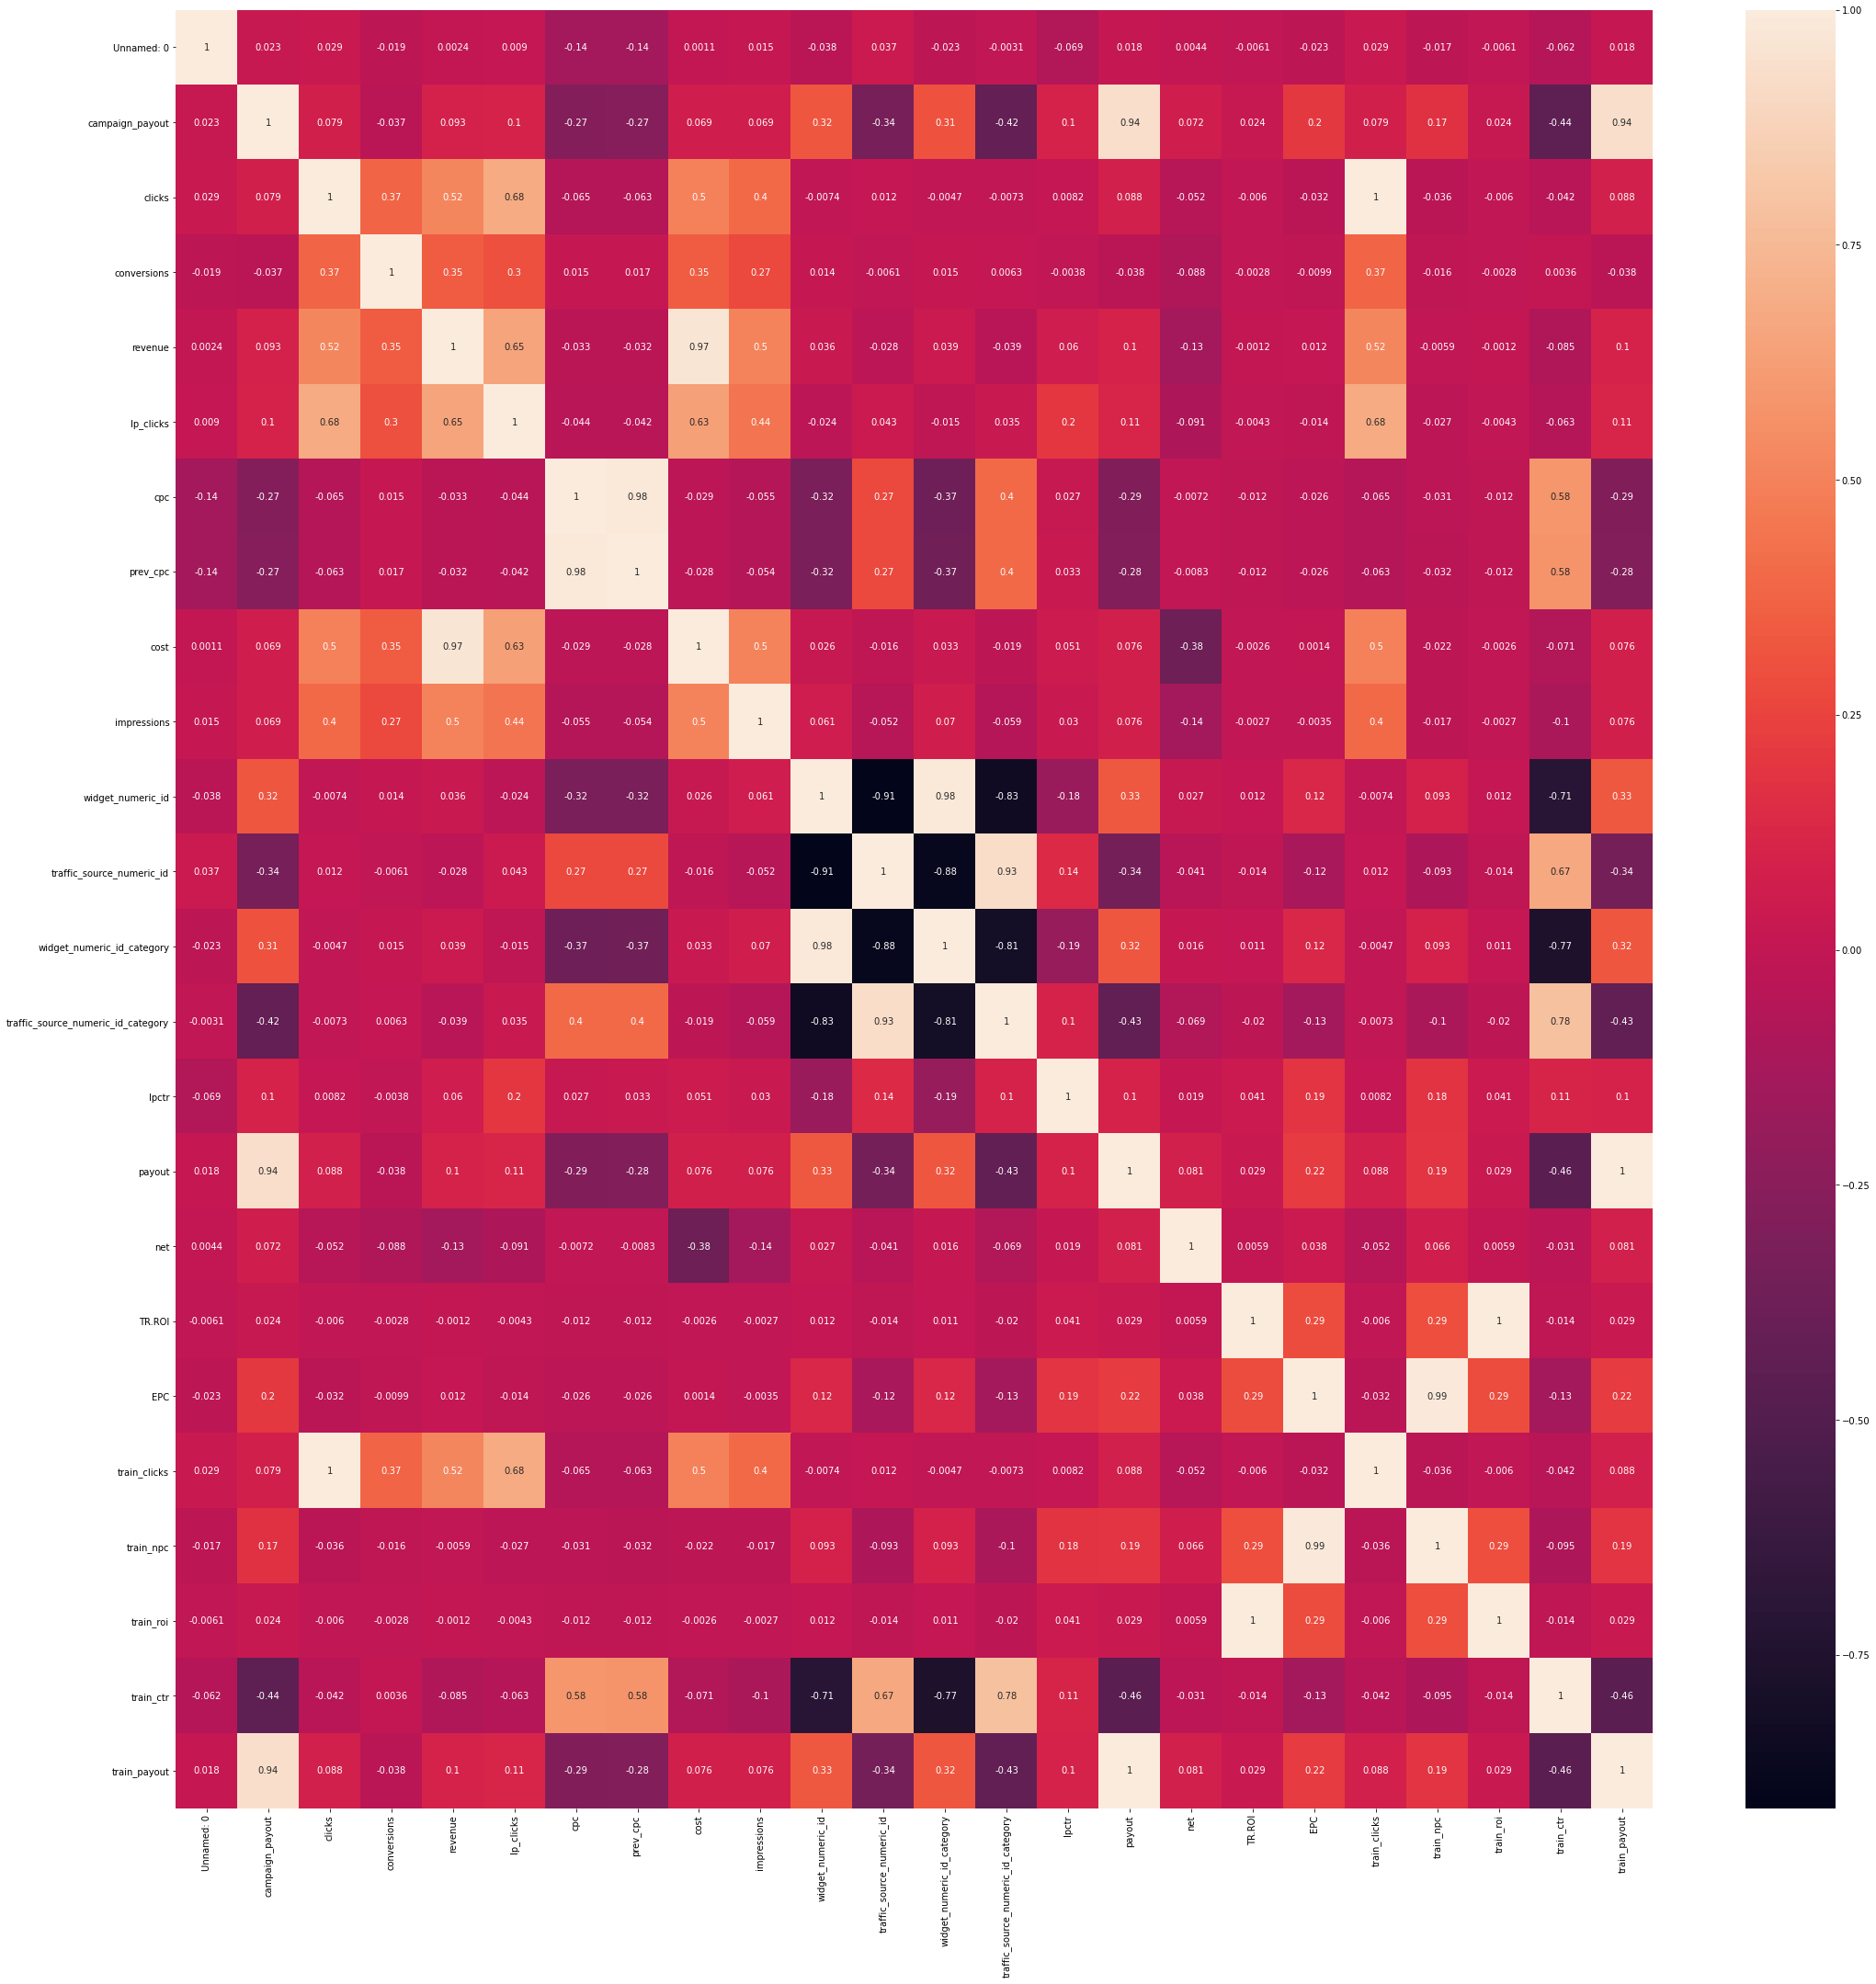

In [10]:
def plotCorr(firstimport):
    plt.figure(figsize=(36,36))
    sns.heatmap(firstimport.corr(), annot=True)
    plt.show()

plotCorr(firstimport)


In [11]:
firstimport1 = pd.DataFrame(firstimport)
firstimport1.to_csv(r'C:\Users\drdia\Desktop\proiect Crystal\firstimport1.csv' ,columns=['cw','traffic_source_name','payout','clicks','conversions','revenue','lp_clicks','cpc','prev_cpc','datetime','cost','impressions','lpctr','payout','net','TR.ROI','EPC','train_npc','train_ctr','predictions_class'],index=False)

In [258]:
firstimport= pd.read_csv (r'C:\Users\drdia\Desktop\proiect Crystal\firstimport.csv')

In [257]:
firstimport

,cw,traffic_source_name,payout,clicks,conversions,revenue,lp_clicks,cpc,prev_cpc,datetime,cost,impressions,lpctr,payout.1,net,TR.ROI,EPC,train_npc,train_ctr,predictions_class
0,0ebf9a5749597f71386aa6c6662c3bcf875c6caadd4678...,Mgid,3.000000,3,1,3.0,0,14.000,14.00,8/9/2020 10:00,0.32,0,0.0,3.000000,2.68,8.375000,1.000000,0.893333,1.000000,undefined
1,0ebf9a5749597f71386aa6c6662c3bcf95a95a0208cb07...,Mgid,3.000000,3,1,3.0,0,14.000,14.00,8/7/2020 10:00,0.45,0,0.0,3.000000,2.55,5.666667,1.000000,0.850000,1.000000,undefined
2,0ebf9a5749597f71386aa6c6662c3bcfe6eca8b9662f0e...,Mgid,1.000000,3,1,1.0,0,14.000,14.00,8/22/2020 17:00,0.42,0,0.0,1.000000,0.58,1.380952,0.333333,0.193333,1.000000,undefined
3,0ebf9a5749597f71386aa6c6662c3bcfe73e596d6dec40...,Mgid,2.000000,3,1,2.0,0,14.000,14.00,7/31/2020 10:00,0.46,0,0.0,2.000000,1.54,3.347826,0.666667,0.513333,1.000000,undefined
4,0ebf9a5749597f71386aa6c6662c3bcff94a048d2ee764...,Mgid,1.000000,3,1,1.0,0,14.000,14.00,8/22/2020 17:00,0.46,0,0.0,1.000000,0.54,1.173913,0.333333,0.180000,1.000000,undefined
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
115649,58c5d76ee86b9ad6a7abf82e158b557ff5b3e874eea4a2...,Mgid,0.182383,57347,15610,2847.0,0,3.060,3.06,8/26/2020 17:00,1849.01,0,0.0,0.182383,997.99,0.539743,0.049645,0.017403,1.000000,undefined
115650,58c5d76ee86b9ad6a7abf82e158b557ff5b3e874eea4a2...,Mgid,0.182383,57353,15610,2847.0,0,2.940,2.94,9/4/2020 22:00,1849.16,0,0.0,0.182383,997.84,0.539618,0.049640,0.017398,1.000000,undefined
115651,58c5d76ee86b9ad6a7abf82e158b557ff5b3e874eea4a2...,Mgid,0.182383,57357,15610,2847.0,0,2.930,2.93,9/5/2020 3:00,1849.31,0,0.0,0.182383,997.69,0.539493,0.049636,0.017394,1.000000,undefined
115652,58c5d76ee86b9ad6a7abf82e158b557ff5b3e874eea4a2...,Mgid,0.186038,63175,16846,3134.0,0,2.910,2.91,9/5/2020 6:00,2001.09,0,0.0,0.186038,1132.91,0.566146,0.049608,0.017933,1.000000,undefined


In [158]:
data=firstimport[(firstimport.impressions>0) & (firstimport.clicks>4)]
data.shape

(51982, 20)

In [159]:
def removeOutliers(data, zScoreTreshold):
    print(data.shape)
    numericalVariablesColumnsList = ["payout", "clicks", "conversions", "net", "TR.ROI", "EPC"]
    z = np.abs(stats.zscore(data[numericalVariablesColumnsList]))
    dataFrame_o = data[(z < zScoreTreshold).all(axis=1)]
    print(dataFrame_o.shape)
    return dataFrame_o

In [160]:
data = removeOutliers(data,3)

(51982, 20)
(50306, 20)


In [253]:
data1 = data.sort_values(['cw','datetime'],ascending=(True,False))

In [254]:
data2 = data1.drop_duplicates(subset=['cw'])

In [163]:
data2.predictions_class.value_counts()

stop          7533
no_changes    6400
decrease      1381
undefined      334
increase       234
Name: predictions_class, dtype: int64

In [164]:
data_div=data2['cost']/data2['clicks']
print(data_div)

61093     0.228846
26366     0.368571
78891     0.247442
79582     0.239057
101075    0.178551
            ...   
76346     0.016471
76440     0.017333
1214      0.038000
103748    0.024812
100831    0.333774
Length: 15882, dtype: float64


In [165]:
data3 = pd.concat([data2, data_div.reindex(data2.index)], axis=1)
data3 = data3.rename(columns={0: 'CPC'})

In [166]:
data4 = data3.drop(columns=['cpc', 'prev_cpc'])
data4 = pd.DataFrame(data4)
data4.shape

(15882, 19)

In [167]:
data_undefined = data4[data4['predictions_class'] == 'undefined'] 
data_undefined = pd.DataFrame(data_undefined)
data_undefined.to_csv(r'C:\Users\drdia\Desktop\proiect Crystal\data_undefined.csv', index=False)

In [169]:
df_test=data4[data4.predictions_class != 'undefined']
df_test

,cw,traffic_source_name,payout,clicks,conversions,revenue,lp_clicks,datetime,cost,impressions,lpctr,payout.1,net,TR.ROI,EPC,train_npc,train_ctr,predictions_class,CPC
61093,0020d6c180de00eaa7ce118aaeb5d2c718e3c80c8879a7...,RevContent,31.000000,104,6,186.00,27,8/19/2020 13:00,23.80,30990,0.259615,31.000000,162.20,6.815126,1.788462,1.559615,0.003356,stop,0.228846
26366,0020d6c180de00eaa7ce118aaeb5d2c72f8daf4e63a908...,RevContent,32.000000,35,2,64.00,18,8/19/2020 13:00,12.90,82091,0.514286,32.000000,51.10,3.961240,1.828571,1.460000,0.000426,stop,0.368571
78891,0020d6c180de00eaa7ce118aaeb5d2c7307ea60030b3a1...,RevContent,32.000000,86,12,384.00,18,8/19/2020 14:00,21.28,26790,0.209302,32.000000,362.72,17.045113,4.465116,4.217674,0.003210,stop,0.247442
79582,0020d6c180de00eaa7ce118aaeb5d2c7317aee64b2e047...,RevContent,31.000000,297,12,372.00,78,8/31/2020 20:00,71.00,315708,0.262626,31.000000,301.00,4.239437,1.252525,1.013468,0.000941,stop,0.239057
101075,0020d6c180de00eaa7ce118aaeb5d2c73f8e8591cd9b44...,RevContent,31.428571,276,42,1320.00,158,8/31/2020 20:00,49.28,10926,0.572464,31.428571,1270.72,25.785714,4.782609,4.604058,0.025261,stop,0.178551
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
24424,fed3317f5afa90161a3ee69a6db8946ad37a19bdb67a56...,Taboola,0.240000,16,2,0.48,0,9/7/2020 10:00,1.16,15221,0.000000,0.240000,-0.68,-0.586207,0.030000,-0.042500,0.001051,stop,0.072500
76346,fed3317f5afa90161a3ee69a6db8946ad3f2dc8760f3dd...,Taboola,0.181818,17,11,2.00,0,9/7/2020 11:00,0.28,3056,0.000000,0.181818,1.72,6.142857,0.117647,0.101176,0.005563,no_changes,0.016471
76440,fed3317f5afa90161a3ee69a6db8946ade834b0e7b50dd...,Taboola,0.181818,30,11,2.00,0,9/7/2020 10:00,0.52,5438,0.000000,0.181818,1.48,2.846154,0.066667,0.049333,0.005517,no_changes,0.017333
1214,fed3317f5afa90161a3ee69a6db8946aed06f554d6731f...,Taboola,0.250000,5,1,0.25,0,9/7/2020 17:00,0.19,350,0.000000,0.250000,0.06,0.315789,0.050000,0.012000,0.014286,no_changes,0.038000


In [255]:
#data_undefined.corr()

In [259]:
#def plotCorr(df_test):
   # plt.figure(figsize=(19,19))
    #sns.heatmap(df_test.corr(), annot=True)
   # plt.show()

#plotCorr(df_test)

In [171]:
Taboola=df_test[df_test['traffic_source_name']=='Taboola']
Taboola

,cw,traffic_source_name,payout,clicks,conversions,revenue,lp_clicks,datetime,cost,impressions,lpctr,payout.1,net,TR.ROI,EPC,train_npc,train_ctr,predictions_class,CPC
11442,01d3bbfb2d4bbb6213a1b906f1cbf481088f6e5217c3a9...,Taboola,1.000000,67,1,1.00,0,9/10/2020 9:00,4.09,12358,0.0,1.000000,-3.09,-0.755501,0.014925,-0.046119,0.005422,stop,0.061045
22243,01d3bbfb2d4bbb6213a1b906f1cbf4810a543769e553f1...,Taboola,1.000000,6,2,2.00,0,8/5/2020 6:00,1.18,564,0.0,1.000000,0.82,0.694915,0.333333,0.136667,0.010638,no_changes,0.196667
101409,01d3bbfb2d4bbb6213a1b906f1cbf4810d35309bc9c152...,Taboola,1.186047,267,43,51.00,0,9/5/2020 12:00,44.48,263652,0.0,1.186047,6.52,0.146583,0.191011,0.024419,0.001013,no_changes,0.166592
106492,01d3bbfb2d4bbb6213a1b906f1cbf48110da5906e96239...,Taboola,1.231884,1185,69,85.00,0,9/5/2020 6:00,417.35,508772,0.0,1.231884,-332.35,-0.796334,0.071730,-0.280464,0.002329,stop,0.352194
88800,01d3bbfb2d4bbb6213a1b906f1cbf481132b110820cea2...,Taboola,1.222222,790,18,22.00,0,8/5/2020 13:00,97.30,657668,0.0,1.222222,-75.30,-0.773895,0.027848,-0.095316,0.001201,stop,0.123165
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
24424,fed3317f5afa90161a3ee69a6db8946ad37a19bdb67a56...,Taboola,0.240000,16,2,0.48,0,9/7/2020 10:00,1.16,15221,0.0,0.240000,-0.68,-0.586207,0.030000,-0.042500,0.001051,stop,0.072500
76346,fed3317f5afa90161a3ee69a6db8946ad3f2dc8760f3dd...,Taboola,0.181818,17,11,2.00,0,9/7/2020 11:00,0.28,3056,0.0,0.181818,1.72,6.142857,0.117647,0.101176,0.005563,no_changes,0.016471
76440,fed3317f5afa90161a3ee69a6db8946ade834b0e7b50dd...,Taboola,0.181818,30,11,2.00,0,9/7/2020 10:00,0.52,5438,0.0,0.181818,1.48,2.846154,0.066667,0.049333,0.005517,no_changes,0.017333
1214,fed3317f5afa90161a3ee69a6db8946aed06f554d6731f...,Taboola,0.250000,5,1,0.25,0,9/7/2020 17:00,0.19,350,0.0,0.250000,0.06,0.315789,0.050000,0.012000,0.014286,no_changes,0.038000


In [172]:
Mgid=df_test[df_test.traffic_source_name=='Mgid']
Mgid

,cw,traffic_source_name,payout,clicks,conversions,revenue,lp_clicks,datetime,cost,impressions,lpctr,payout.1,net,TR.ROI,EPC,train_npc,train_ctr,predictions_class,CPC


In [173]:
RevContent=df_test[df_test.traffic_source_name=='RevContent']
RevContent

,cw,traffic_source_name,payout,clicks,conversions,revenue,lp_clicks,datetime,cost,impressions,lpctr,payout.1,net,TR.ROI,EPC,train_npc,train_ctr,predictions_class,CPC
61093,0020d6c180de00eaa7ce118aaeb5d2c718e3c80c8879a7...,RevContent,31.000000,104,6,186.0,27,8/19/2020 13:00,23.800,30990,0.259615,31.000000,162.200,6.815126,1.788462,1.559615,0.003356,stop,0.228846
26366,0020d6c180de00eaa7ce118aaeb5d2c72f8daf4e63a908...,RevContent,32.000000,35,2,64.0,18,8/19/2020 13:00,12.900,82091,0.514286,32.000000,51.100,3.961240,1.828571,1.460000,0.000426,stop,0.368571
78891,0020d6c180de00eaa7ce118aaeb5d2c7307ea60030b3a1...,RevContent,32.000000,86,12,384.0,18,8/19/2020 14:00,21.280,26790,0.209302,32.000000,362.720,17.045113,4.465116,4.217674,0.003210,stop,0.247442
79582,0020d6c180de00eaa7ce118aaeb5d2c7317aee64b2e047...,RevContent,31.000000,297,12,372.0,78,8/31/2020 20:00,71.000,315708,0.262626,31.000000,301.000,4.239437,1.252525,1.013468,0.000941,stop,0.239057
101075,0020d6c180de00eaa7ce118aaeb5d2c73f8e8591cd9b44...,RevContent,31.428571,276,42,1320.0,158,8/31/2020 20:00,49.280,10926,0.572464,31.428571,1270.720,25.785714,4.782609,4.604058,0.025261,stop,0.178551
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21267,fc9845e6a8d6d50aff1c156b713ad7dc21809d04530a23...,RevContent,60.000000,20827,1,60.0,3271,7/16/2020 16:00,129.497,1233488,0.157056,60.000000,-69.497,-0.536669,0.002881,-0.003337,0.016885,stop,0.006218
15042,fc9845e6a8d6d50aff1c156b713ad7dc46be853af0444d...,RevContent,60.000000,162,1,60.0,58,8/24/2020 15:00,0.315,6238,0.358025,60.000000,59.685,189.476191,0.370370,0.368426,0.025970,stop,0.001944
84409,fc9845e6a8d6d50aff1c156b713ad7dc4c1aa65ba3bfa0...,RevContent,85.714286,19900,14,1200.0,4145,8/24/2020 15:00,131.591,4829296,0.208291,85.714286,1068.409,8.119165,0.060302,0.053689,0.004121,stop,0.006613
13151,fc9845e6a8d6d50aff1c156b713ad7dcbc17c4c0fa60b1...,RevContent,60.000000,101,1,60.0,12,6/30/2020 23:00,0.348,25402,0.118812,60.000000,59.652,171.413793,0.594059,0.590614,0.003976,stop,0.003446


In [174]:
x=df_test[['clicks','revenue', 'impressions', 'net', 'TR.ROI', 'EPC','CPC']]
y=df_test[['predictions_class']]

In [175]:
pca=PCA(n_components=2)# trasnforma cate dimensiuni avem in doar 2 dimensiuni
pca.fit(x)
x_pca=pca.transform(x)

In [176]:
print(pca.explained_variance_ratio_)

[9.99998616e-01 1.24933641e-06]


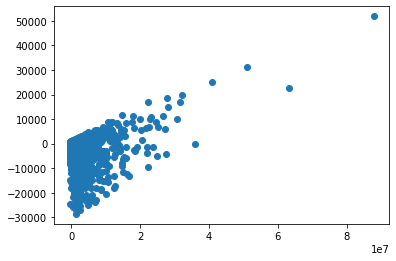

In [177]:
plt.scatter(x_pca[:,0], x_pca[:,1])

In [178]:
kmeans=KMeans(n_clusters = 3, random_state = 0).fit(x_pca)

In [179]:
kmeans_classes=kmeans.predict(x_pca)

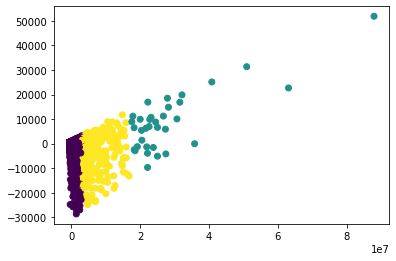

In [180]:
plt.scatter(x_pca[:,0], x_pca[:,1], c=kmeans_classes)

In [181]:
 le = preprocessing.LabelEncoder() 
y = y.values.reshape(1,-1)[0] 
#y[y == 'no_changes'] = 'no_sugg' 
#y[y == 'increase'] = 'increase' 
#y[y == 'decrease'] = 'decrease' 
#y[y == 'stop'] = 'stop'


y = le.fit_transform(y) #check for nuLts 
nans = df_test.isnull().sum() 


In [182]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=42) 
x_train 



,clicks,revenue,impressions,net,TR.ROI,EPC,CPC
19142,574,44.00,102178,-39.50,-0.473054,0.076655,0.145470
108051,1858,1176.00,265011,760.65,1.831347,0.632939,0.223547
1786,6,0.18,1955,-0.04,-0.181818,0.030000,0.036667
52238,966,84.00,128390,-90.17,-0.517713,0.086957,0.180300
61884,194,90.00,64687,25.00,0.384615,0.463918,0.335052
...,...,...,...,...,...,...,...
27735,59,4.00,30107,-12.23,-0.753543,0.067797,0.275085
26439,36,16.00,4141,7.73,0.934704,0.444444,0.229722
3125,9,0.21,1865,-0.05,-0.192308,0.023333,0.028889
42480,253,105.00,127610,58.75,1.270270,0.415020,0.182806


In [183]:

print(y_test)

[0 2 2 ... 3 3 2]


In [185]:
print(y_pred)

[3 3 3 ... 3 3 3]


In [186]:
a=ADASYN()
x_res, y_res=x_train,y_train
#a.fit_resample(x_train, y_train)
#scaler = preprocessing.StandardScaler().fit(x_train)
#x_train = scaler.transform(x_train)
#x_test = scaler.transform(x_test)

In [187]:
model=tree.DecisionTreeClassifier()

In [188]:
model.fit(x_res,y_res)

DecisionTreeClassifier()

In [189]:
y_pred=model.predict(x_test)

In [190]:
confusion_matrix = confusion_matrix(y_test, y_pred)

In [191]:
print(confusion_matrix)

[[ 120    1  106  180]
 [   4   50   21    3]
 [  83   13 1465  302]
 [ 202    2  311 1802]]


In [192]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.29      0.29      0.29       407
           1       0.76      0.64      0.69        78
           2       0.77      0.79      0.78      1863
           3       0.79      0.78      0.78      2317

    accuracy                           0.74      4665
   macro avg       0.65      0.62      0.64      4665
weighted avg       0.74      0.74      0.74      4665



In [193]:
print(accuracy_score(y_test, y_pred))

0.7367631296891747


In [194]:
predictions = pd.DataFrame({'true_y_values': y_test, 'predicted_y_values': y_pred})
predictions

,true_y_values,predicted_y_values
0,0,3
1,2,3
2,2,0
3,3,3
4,2,2
...,...,...
4660,3,0
4661,2,3
4662,3,3
4663,3,0


In [195]:
###RANDOM FOREST###

In [196]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix

In [197]:
model_crf = RandomForestClassifier()

In [198]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=42)

In [199]:
model_crf.fit(x_res,y_res)

RandomForestClassifier()

In [200]:
y_pred = model_crf.predict(x_test)

In [201]:
confusion_matrix = confusion_matrix(y_test,y_pred)

In [202]:
print(confusion_matrix)

[[  88    1   96  222]
 [   2   54   17    5]
 [  51   10 1536  266]
 [  89    1  179 2048]]


In [203]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.38      0.22      0.28       407
           1       0.82      0.69      0.75        78
           2       0.84      0.82      0.83      1863
           3       0.81      0.88      0.84      2317

    accuracy                           0.80      4665
   macro avg       0.71      0.65      0.68      4665
weighted avg       0.78      0.80      0.79      4665



In [204]:
print(accuracy_score(y_test, y_pred))

0.7987138263665595


In [261]:
### Support Vector Machine Model
#from sklearn import svm
#from sklearn.metrics import confusion_matrix
#model_svm = svm.SVC()
#a = ADASYN()

#x_res, y_res = x_train, y_train 
#a.fit_resample(x_train, y_train)
#scaler = preprocessing.StandardScaler().fit(x_train)
#x_train = scaler.transform(x_train)
#x_test = scaler.transform(x_test)
#X_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=42)
#model_svm.fit(x_res,y_res)
#y_pred = model_svm.predict(x_test)
#confusion_matrix = confusion_matrix(y_test,y_pred)
#print(confusion_matrix)
#print(classification_report(y_test,y_pred))
#print(accuracy_score(y_test, y_pred))

In [215]:
###LOGISTIC REGRESION
#from sklearn.linear_model import LogisticRegression
#from sklearn.metrics import confusion_matrix
#from sklearn.metrics import classification_report

#X_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=42)
#model_lreg = LogisticRegression()
#model_lreg.fit(x_res,y_res)
#y_pred = model_lreg.predict(x_test)
#confusion_matrix_logistic = confusion_matrix(y_test,y_pred)
#print(confusion_matrix_logistic)
#[[   0    0    1  406]
# [   0    0    1   77]
# [   4    0    7 1852]
# [   8    0   15 2294]]

#print(classification_report(y_test,y_pred))
#print(accuracy_score(y_test, y_pred))
#0.4932475884244373

In [224]:
#histograma in functie de revenue, net la cele doua site-uri

In [225]:
import matplotlib.pyplot as plt
import seaborn as sns

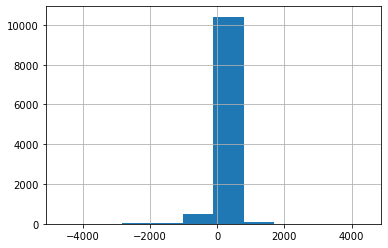

In [226]:
#df_test.groupby(['traffic_source_name'])['net'].value_counts().unstack().plot.bar
Taboola['net'].hist()

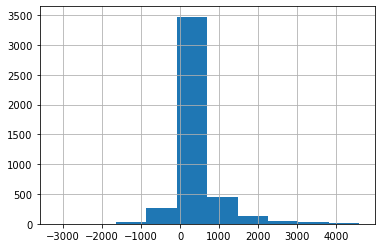

In [227]:
RevContent['net'].hist()

In [228]:
#positive['Cost per Conv'].quantile(0.9)

In [229]:
df_test1_positive_mask = df_test['conversions']>0
df_test1_positive_mask

61093     True
26366     True
78891     True
79582     True
101075    True
          ... 
24424     True
76346     True
76440     True
1214      True
103748    True
Name: conversions, Length: 15548, dtype: bool

In [230]:
df_test1_positive = df_test[df_test1_positive_mask]

In [233]:
df_test1_positive.head(15548)

,cw,traffic_source_name,payout,clicks,conversions,revenue,lp_clicks,datetime,cost,impressions,lpctr,payout.1,net,TR.ROI,EPC,train_npc,train_ctr,predictions_class,CPC,Cost per Conv
61093,0020d6c180de00eaa7ce118aaeb5d2c718e3c80c8879a7...,RevContent,31.000000,104,6,186.00,27,8/19/2020 13:00,23.80,30990,0.259615,31.000000,162.20,6.815126,1.788462,1.559615,0.003356,stop,0.228846,3.966667
26366,0020d6c180de00eaa7ce118aaeb5d2c72f8daf4e63a908...,RevContent,32.000000,35,2,64.00,18,8/19/2020 13:00,12.90,82091,0.514286,32.000000,51.10,3.961240,1.828571,1.460000,0.000426,stop,0.368571,6.450000
78891,0020d6c180de00eaa7ce118aaeb5d2c7307ea60030b3a1...,RevContent,32.000000,86,12,384.00,18,8/19/2020 14:00,21.28,26790,0.209302,32.000000,362.72,17.045113,4.465116,4.217674,0.003210,stop,0.247442,1.773333
79582,0020d6c180de00eaa7ce118aaeb5d2c7317aee64b2e047...,RevContent,31.000000,297,12,372.00,78,8/31/2020 20:00,71.00,315708,0.262626,31.000000,301.00,4.239437,1.252525,1.013468,0.000941,stop,0.239057,5.916667
101075,0020d6c180de00eaa7ce118aaeb5d2c73f8e8591cd9b44...,RevContent,31.428571,276,42,1320.00,158,8/31/2020 20:00,49.28,10926,0.572464,31.428571,1270.72,25.785714,4.782609,4.604058,0.025261,stop,0.178551,1.173333
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
24424,fed3317f5afa90161a3ee69a6db8946ad37a19bdb67a56...,Taboola,0.240000,16,2,0.48,0,9/7/2020 10:00,1.16,15221,0.000000,0.240000,-0.68,-0.586207,0.030000,-0.042500,0.001051,stop,0.072500,0.580000
76346,fed3317f5afa90161a3ee69a6db8946ad3f2dc8760f3dd...,Taboola,0.181818,17,11,2.00,0,9/7/2020 11:00,0.28,3056,0.000000,0.181818,1.72,6.142857,0.117647,0.101176,0.005563,no_changes,0.016471,0.025455
76440,fed3317f5afa90161a3ee69a6db8946ade834b0e7b50dd...,Taboola,0.181818,30,11,2.00,0,9/7/2020 10:00,0.52,5438,0.000000,0.181818,1.48,2.846154,0.066667,0.049333,0.005517,no_changes,0.017333,0.047273
1214,fed3317f5afa90161a3ee69a6db8946aed06f554d6731f...,Taboola,0.250000,5,1,0.25,0,9/7/2020 17:00,0.19,350,0.000000,0.250000,0.06,0.315789,0.050000,0.012000,0.014286,no_changes,0.038000,0.190000


In [268]:
df_test.describe()

,payout,clicks,conversions,revenue,lp_clicks,cost,impressions,lpctr,payout.1,net,TR.ROI,EPC,train_npc,train_ctr,CPC
count,15548.000000,15548.000000,15548.000000,15548.000000,15548.000000,15548.000000,1.554800e+04,15548.000000,15548.000000,15548.000000,15548.000000,15548.000000,15548.000000,15548.000000,15548.000000
mean,20.451765,899.680280,19.386931,285.600522,120.396450,190.743754,4.661960e+05,0.112736,20.451765,94.856768,5.706933,0.683310,0.497987,0.006691,0.185322
std,24.343401,2601.287235,57.181422,826.915665,441.173012,740.300191,1.949827e+06,0.158190,24.343401,427.169403,22.386715,1.250211,1.237467,0.016927,0.310988
min,0.173228,5.000000,1.000000,0.180000,0.000000,0.010000,1.000000e+01,0.000000,0.173228,-4640.210000,-0.994278,0.000373,-15.656983,0.000012,0.000064
25%,0.400000,26.000000,2.000000,3.000000,0.000000,1.680000,6.607500e+03,0.000000,0.400000,-0.250000,-0.095423,0.064516,-0.008263,0.001585,0.040000
50%,8.891414,115.500000,5.000000,40.000000,4.000000,15.290000,3.949800e+04,0.048544,8.891414,4.123000,0.993448,0.202471,0.058434,0.003329,0.138015
75%,40.000000,549.000000,14.000000,220.000000,58.000000,91.850000,2.208355e+05,0.175118,40.000000,77.466750,4.369920,0.669247,0.417554,0.007199,0.245531
max,87.000000,29421.000000,1054.000000,26004.000000,12596.000000,27361.480000,8.836848e+07,1.000000,87.000000,4592.968000,665.666667,8.727273,8.590678,1.000000,15.946240


In [234]:
df_test1_positive['Cost per Conv'] = df_test['cost']/df_test['conversions']

In [281]:
df_test1_positive['Payout'] = df_test['revenue']/df_test['conversions']

In [282]:
df_test1_positive.head(15548)

,cw,traffic_source_name,payout,clicks,conversions,revenue,lp_clicks,datetime,cost,impressions,lpctr,payout.1,net,TR.ROI,EPC,train_npc,train_ctr,predictions_class,CPC,Cost per Conv,Payout
61093,0020d6c180de00eaa7ce118aaeb5d2c718e3c80c8879a7...,RevContent,31.000000,104,6,186.00,27,8/19/2020 13:00,23.80,30990,0.259615,31.000000,162.20,6.815126,1.788462,1.559615,0.003356,stop,0.228846,3.966667,31.000000
26366,0020d6c180de00eaa7ce118aaeb5d2c72f8daf4e63a908...,RevContent,32.000000,35,2,64.00,18,8/19/2020 13:00,12.90,82091,0.514286,32.000000,51.10,3.961240,1.828571,1.460000,0.000426,stop,0.368571,6.450000,32.000000
78891,0020d6c180de00eaa7ce118aaeb5d2c7307ea60030b3a1...,RevContent,32.000000,86,12,384.00,18,8/19/2020 14:00,21.28,26790,0.209302,32.000000,362.72,17.045113,4.465116,4.217674,0.003210,stop,0.247442,1.773333,32.000000
79582,0020d6c180de00eaa7ce118aaeb5d2c7317aee64b2e047...,RevContent,31.000000,297,12,372.00,78,8/31/2020 20:00,71.00,315708,0.262626,31.000000,301.00,4.239437,1.252525,1.013468,0.000941,stop,0.239057,5.916667,31.000000
101075,0020d6c180de00eaa7ce118aaeb5d2c73f8e8591cd9b44...,RevContent,31.428571,276,42,1320.00,158,8/31/2020 20:00,49.28,10926,0.572464,31.428571,1270.72,25.785714,4.782609,4.604058,0.025261,stop,0.178551,1.173333,31.428571
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
24424,fed3317f5afa90161a3ee69a6db8946ad37a19bdb67a56...,Taboola,0.240000,16,2,0.48,0,9/7/2020 10:00,1.16,15221,0.000000,0.240000,-0.68,-0.586207,0.030000,-0.042500,0.001051,stop,0.072500,0.580000,0.240000
76346,fed3317f5afa90161a3ee69a6db8946ad3f2dc8760f3dd...,Taboola,0.181818,17,11,2.00,0,9/7/2020 11:00,0.28,3056,0.000000,0.181818,1.72,6.142857,0.117647,0.101176,0.005563,no_changes,0.016471,0.025455,0.181818
76440,fed3317f5afa90161a3ee69a6db8946ade834b0e7b50dd...,Taboola,0.181818,30,11,2.00,0,9/7/2020 10:00,0.52,5438,0.000000,0.181818,1.48,2.846154,0.066667,0.049333,0.005517,no_changes,0.017333,0.047273,0.181818
1214,fed3317f5afa90161a3ee69a6db8946aed06f554d6731f...,Taboola,0.250000,5,1,0.25,0,9/7/2020 17:00,0.19,350,0.000000,0.250000,0.06,0.315789,0.050000,0.012000,0.014286,no_changes,0.038000,0.190000,0.250000


In [287]:
df_test1_positive.sort_values(by=['CPC'])

,cw,traffic_source_name,payout,clicks,conversions,revenue,lp_clicks,datetime,cost,impressions,lpctr,payout.1,net,TR.ROI,EPC,train_npc,train_ctr,predictions_class,CPC,Cost per Conv,Payout
34617,c98951737f3a6f419705e79d214c572e6a57bb77fb8e9b...,RevContent,5.000000,1196,2,10.0,607,6/30/2020 23:00,0.076,12568,0.507525,5.000000,9.924,130.578947,0.008361,0.008298,0.095162,no_changes,0.000064,0.038000,5.000000
19035,17fe0fbc5393b7123d0b491e005792a0c1d3e42cf18e70...,RevContent,1.000000,551,1,1.0,430,8/8/2020 21:00,0.079,1523,0.780399,1.000000,0.921,11.658228,0.001815,0.001672,0.361786,no_changes,0.000143,0.079000,1.000000
77789,d931d5f377fe2d296388911f94a2aa266ecfcb3c5828a1...,RevContent,6.000000,794,11,66.0,576,8/16/2020 7:00,0.119,100876,0.725441,6.000000,65.881,553.621849,0.083123,0.082974,0.007871,no_changes,0.000150,0.010818,6.000000
40079,0d9f252d55a5a4b06398daf9f339534cf9e3af82fef449...,Taboola,0.333333,76,3,1.0,0,8/19/2020 16:00,0.020,904,0.000000,0.333333,0.980,49.000000,0.013158,0.012895,0.084071,no_changes,0.000263,0.006667,0.333333
95038,c98951737f3a6f419705e79d214c572ed75cac6d871c56...,RevContent,1.153846,4422,26,30.0,2638,6/30/2020 23:00,1.932,516842,0.596563,1.153846,28.068,14.527950,0.006784,0.006347,0.008556,stop,0.000437,0.074308,1.153846
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16494,385c507ecafed27eac9313e74fcfb30c097cee9b2b16fc...,Taboola,70.000000,244,1,70.0,58,8/9/2020 15:00,2835.340,135701,0.237705,70.000000,-2765.340,-0.975312,0.286885,-11.333361,0.001798,no_changes,11.620246,2835.340000,70.000000
4753,3282eedc07b85dc6c3d13857533671e3d8a25fcd08b299...,RevContent,23.000000,14,1,23.0,2,8/25/2020 14:00,169.200,665665,0.142857,23.000000,-146.200,-0.864066,1.642857,-10.442857,0.000021,stop,12.085714,169.200000,23.000000
13407,cc92c3108549acf1545e3c13d04b59bd55d67183241613...,Taboola,70.000000,107,1,70.0,23,7/29/2020 8:00,1342.470,77823,0.214953,70.000000,-1272.470,-0.947857,0.654206,-11.892243,0.001375,no_changes,12.546449,1342.470000,70.000000
13169,385c507ecafed27eac9313e74fcfb30ce851c26eb74af3...,Taboola,70.000000,101,1,70.0,17,8/7/2020 15:00,1417.040,104926,0.168317,70.000000,-1347.040,-0.950601,0.693069,-13.337030,0.000963,no_changes,14.030099,1417.040000,70.000000


In [284]:
import matplotlib.pyplot as plt

In [285]:
#x_values = df_test1_positive['clicks']
y_payout = df_test1_positive['Payout']
y_cpcon = df_test1_positive['Cost per Conv']

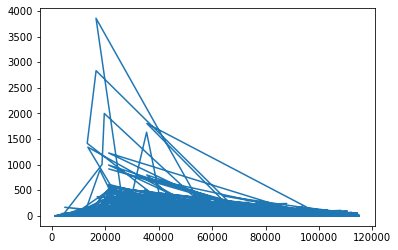

In [288]:
plt.plot(y_cpcon)

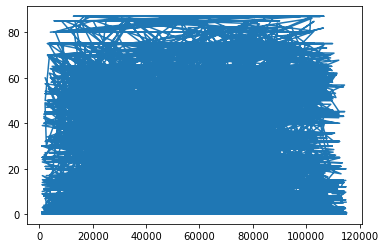

In [286]:
plt.plot(y_payout)

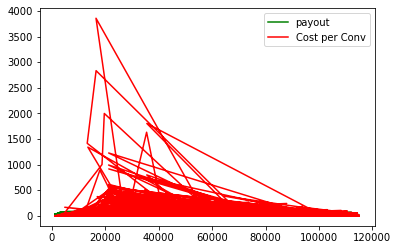

In [278]:
plt.plot(y_payout, label = 'payout',color ='green')
plt.plot(y_cpcon,label = 'Cost per Conv',color = 'red')
plt.legend()

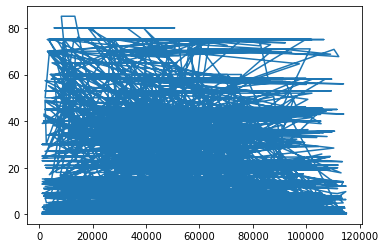

In [248]:
plt.plot(y_payout)

(array([6225.,  740.,  399.,  229.,  148.,   95.,   45.,   29.,   13.,
          15.]),
 array([2.00000e-03, 7.36880e+00, 1.47356e+01, 2.21024e+01, 2.94692e+01,
        3.68360e+01, 4.42028e+01, 5.15696e+01, 5.89364e+01, 6.63032e+01,
        7.36700e+01]),
 <a list of 10 Patch objects>)

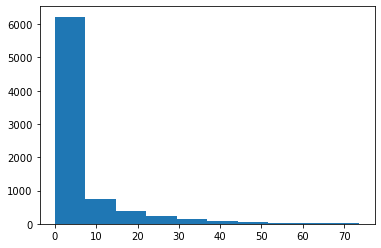

In [247]:
plt.hist(y_cpcon)

In [239]:
Taboola_positive_mask = Taboola['net']>0

In [240]:
Taboola_positive = Taboola[Taboola_positive_mask]

In [241]:
Taboola_positive.head(11093)

,cw,traffic_source_name,payout,clicks,conversions,revenue,lp_clicks,datetime,cost,impressions,lpctr,payout.1,net,TR.ROI,EPC,train_npc,train_ctr,predictions_class,CPC
22243,01d3bbfb2d4bbb6213a1b906f1cbf4810a543769e553f1...,Taboola,1.000000,6,2,2.00,0,8/5/2020 6:00,1.18,564,0.0,1.000000,0.82,0.694915,0.333333,0.136667,0.010638,no_changes,0.196667
101409,01d3bbfb2d4bbb6213a1b906f1cbf4810d35309bc9c152...,Taboola,1.186047,267,43,51.00,0,9/5/2020 12:00,44.48,263652,0.0,1.186047,6.52,0.146583,0.191011,0.024419,0.001013,no_changes,0.166592
64873,01d3bbfb2d4bbb6213a1b906f1cbf481321d7f38e3df98...,Taboola,1.142857,19,7,8.00,0,8/20/2020 15:00,2.14,1571,0.0,1.142857,5.86,2.738318,0.421053,0.308421,0.012094,decrease,0.112632
107739,01d3bbfb2d4bbb6213a1b906f1cbf4817ac3137b07c5d5...,Taboola,1.225000,598,80,98.00,0,9/6/2020 12:00,72.09,947357,0.0,1.225000,25.91,0.359412,0.163880,0.043328,0.000631,no_changes,0.120552
36669,01d3bbfb2d4bbb6213a1b906f1cbf4819fc2ebd3ffb91a...,Taboola,1.000000,11,3,3.00,0,8/18/2020 0:00,0.50,9838,0.0,1.000000,2.50,5.000000,0.272727,0.227273,0.001118,no_changes,0.045455
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3109,fed3317f5afa90161a3ee69a6db8946aca66b794e04ee3...,Taboola,0.220000,9,1,0.22,0,9/7/2020 18:00,0.19,1650,0.0,0.220000,0.03,0.157895,0.024444,0.003333,0.005455,no_changes,0.021111
76346,fed3317f5afa90161a3ee69a6db8946ad3f2dc8760f3dd...,Taboola,0.181818,17,11,2.00,0,9/7/2020 11:00,0.28,3056,0.0,0.181818,1.72,6.142857,0.117647,0.101176,0.005563,no_changes,0.016471
76440,fed3317f5afa90161a3ee69a6db8946ade834b0e7b50dd...,Taboola,0.181818,30,11,2.00,0,9/7/2020 10:00,0.52,5438,0.0,0.181818,1.48,2.846154,0.066667,0.049333,0.005517,no_changes,0.017333
1214,fed3317f5afa90161a3ee69a6db8946aed06f554d6731f...,Taboola,0.250000,5,1,0.25,0,9/7/2020 17:00,0.19,350,0.0,0.250000,0.06,0.315789,0.050000,0.012000,0.014286,no_changes,0.038000


In [244]:
Taboola_positive['Cost per Conv'] = Taboola_positive['cost']/Taboola_positive['conversions']

<ipython-input-244-ddf321242cb6>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Taboola_positive['Cost per Conv'] = Taboola_positive['cost']/Taboola_positive['conversions']


In [245]:
y_payout = Taboola_positive['payout']
y_cpcon = Taboola_positive['Cost per Conv']

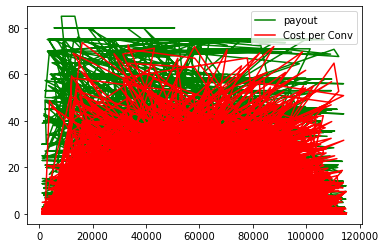

In [246]:
plt.plot(y_payout, label = 'payout',color ='green')
plt.plot(y_cpcon,label = 'Cost per Conv',color = 'red')
plt.legend()

In [124]:
RevContent_positive_mask = RevContent['net']>0

In [125]:
RevContent_positive = RevContent[RevContent_positive_mask]

In [126]:
RevContent_positive.head(4455)

,Unnamed: 0,campaign_id,campaign_payout,clicks,conversions,revenue,lp_clicks,widget_id,datetime,cost,impressions,widget_name,traffic_source_name,widget_numeric_id,traffic_source_numeric_id,widget_numeric_id_category,traffic_source_numeric_id_category,lpctr,payout,cw,net,TR.ROI,EPC,train_clicks,train_npc,train_roi,train_ctr,train_payout,prediction_class_id,predictions_class,prob_no_changes,prob_increase,prob_decrease,prob_stop,CPC
61093,91,0020d6c180de00eaa7ce118aaeb5d2c7,31.330049,104,6,186.0,27,18e3c80c8879a74c8ee7c9a58e6791c5,8/19/2020 13:00,23.800,30990,115238,RevContent,941880,6,93941,0,0.259615,31.000000,0020d6c180de00eaa7ce118aaeb5d2c718e3c80c8879a7...,162.200,6.815126,1.788462,104,1.559615,6.815126,0.003356,31.000000,3,stop,0.178522065,3.00881E-05,0.082266934,0.739180923,0.228846
26366,167,0020d6c180de00eaa7ce118aaeb5d2c7,31.330049,35,2,64.0,18,2f8daf4e63a90851eefe044984442f24,8/19/2020 13:00,12.900,82091,115869,RevContent,942322,6,94171,0,0.514286,32.000000,0020d6c180de00eaa7ce118aaeb5d2c72f8daf4e63a908...,51.100,3.961240,1.828571,35,1.460000,3.961240,0.000426,32.000000,3,stop,0.063148931,2.0163E-05,0.001329421,0.935501516,0.368571
78891,173,0020d6c180de00eaa7ce118aaeb5d2c7,31.330049,86,12,384.0,18,307ea60030b3a166a63cd82dd78116f6,8/19/2020 14:00,21.280,26790,138711,RevContent,946894,6,95294,0,0.209302,32.000000,0020d6c180de00eaa7ce118aaeb5d2c7307ea60030b3a1...,362.720,17.045113,4.465116,86,4.217674,17.045113,0.003210,32.000000,3,stop,0.173502013,0.000277444,0.008474271,0.817746222,0.247442
79582,179,0020d6c180de00eaa7ce118aaeb5d2c7,31.330049,297,12,372.0,78,317aee64b2e0473deac9ad3508985bbc,8/31/2020 20:00,71.000,315708,140165,RevContent,947164,6,95420,0,0.262626,31.000000,0020d6c180de00eaa7ce118aaeb5d2c7317aee64b2e047...,301.000,4.239437,1.252525,297,1.013468,4.239437,0.000941,31.000000,3,stop,0.059819654,4.00771E-05,0.003431625,0.93670857,0.239057
101075,229,0020d6c180de00eaa7ce118aaeb5d2c7,31.330049,276,42,1320.0,158,3f8e8591cd9b4438b763d16d26b8df93,8/31/2020 20:00,49.280,10926,117418,RevContent,943150,6,94485,0,0.572464,31.428571,0020d6c180de00eaa7ce118aaeb5d2c73f8e8591cd9b44...,1270.720,25.785714,4.782609,276,4.604058,25.785714,0.025261,31.428571,3,stop,0.063168935,0.001700164,0.048127498,0.887003422,0.178551
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95473,645576,f88ec42f84e140d6e1df5cff89e49721,9.914017,1241,27,255.0,187,fe5003ce027bc120854d488c7e05ac7a,8/24/2020 13:00,214.750,395155,114883,RevContent,941671,6,93861,0,0.150685,9.444444,f88ec42f84e140d6e1df5cff89e49721fe5003ce027bc1...,40.250,0.187427,0.205479,1241,0.032434,0.187427,0.003141,9.444444,3,stop,0.435216665,1.87485E-05,3.49981E-05,0.564729631,0.173046
15042,652915,fc9845e6a8d6d50aff1c156b713ad7dc,75.000000,162,1,60.0,58,46be853af0444d6d64c38bb3374c40ad,8/24/2020 15:00,0.315,6238,69714,RevContent,960321,6,98943,0,0.358025,60.000000,fc9845e6a8d6d50aff1c156b713ad7dc46be853af0444d...,59.685,189.476191,0.370370,162,0.368426,189.476191,0.025970,60.000000,3,stop,0.05118097,0.005697934,0.001155179,0.941965878,0.001944
84409,652922,fc9845e6a8d6d50aff1c156b713ad7dc,75.000000,19900,14,1200.0,4145,4c1aa65ba3bfa017ee8659a3a71cc8f2,8/24/2020 15:00,131.591,4829296,110826,RevContent,939430,6,93005,0,0.208291,85.714286,fc9845e6a8d6d50aff1c156b713ad7dc4c1aa65ba3bfa0...,1068.409,8.119165,0.060302,19900,0.053689,8.119165,0.004121,85.714286,3,stop,0.065468185,0.000110033,0.000135841,0.934285939,0.006613
13151,653098,fc9845e6a8d6d50aff1c156b713ad7dc,75.000000,101,1,60.0,12,bc17c4c0fa60b162513094172b9f6467,6/30/2020 23:00,0.348,25402,117613,RevContent,943226,6,94514,0,0.118812,60.000000,fc9845e6a8d6d50aff1c156b713ad7dcbc17c4c0fa60b1...,59.652,171.413793,0.594059,101,0.590614,171.413793,0.003976,60.000000,3,stop,0.022830898,0.007895232,0.001220198,0.968053699,0.003446


In [127]:
y_payout = Taboola_positive['net']
y_cpcon = RevContent_positive['net']

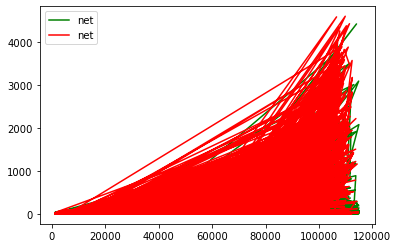

In [128]:
plt.plot(y_payout, label = 'net',color ='green')
plt.plot(y_cpcon,label = 'net',color = 'red')
plt.legend()